In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# accessing data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/AIP Team 5/new_data.csv')
# converting comments into lowercase
data['processed_text'] = data['processed_text'].str.lower()

# first 5 samples from dataset
data.head()

,comment,label,processed_text,comment_len,processed_text_len
0,Mohammad harun he is an awesome guy very info...,1,mohammad harun awesome guy informative helpful...,44,22.0
1,amazing guy gaurav was so patience and kind ...,1,amazing guy gaurav patience kind helped start ...,55,27.0
2,Gaurav was very knowledgeable and very helpful...,1,gaurav knowledgeable helpful knows situation a...,36,17.0
3,I called them regarding my flight cancellation...,1,i called regarding flight cancellation narrate...,34,19.0
4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,1,very good service by gaurav lohat served as so...,23,23.0


In [ ]:
# spliting 30000 positive random samples
df_train_pos = data[data['label']==1].sample(3000, random_state=13)
df_test_pos = data[data['label']==1].drop(df_train_pos.index)

# spliting 20000 negative random samples
df_train_neg = data[data['label']==0].sample(2000, random_state=13)
df_test_neg = data[data['label']==0].drop(df_train_neg.index)

# joining negative and positives samples for train and test
df_train = pd.concat([df_train_pos,df_train_neg])
df_test = pd.concat([df_test_pos,df_test_neg])


In [ ]:
# creating X and y for train and test
X_train = df_train['processed_text']
y_train = df_train['label']

X_test = df_test['processed_text']
y_test = df_test['label']

#tsne

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
final_counts = count_vect.fit_transform(df_train['processed_text'].values)
print('Type: ', type(final_counts))
print('shape: ', final_counts.get_shape)
print('No. of unique words: ', final_counts.get_shape()[1])

Type:  <class 'scipy.sparse._csr.csr_matrix'>
shape:  <bound method spmatrix.get_shape of <5000x9514 sparse matrix of type '<class 'numpy.int64'>'
	with 124485 stored elements in Compressed Sparse Row format>>
No. of unique words:  9514


       Dim1      Dim2  label
0 -0.477425 -1.207761    1.0
1  1.700121 -0.726364    1.0
2 -1.534270 -1.283682    1.0
3  0.101379  0.427829    1.0
4 -0.067941 -0.300998    1.0
(5000, 3)


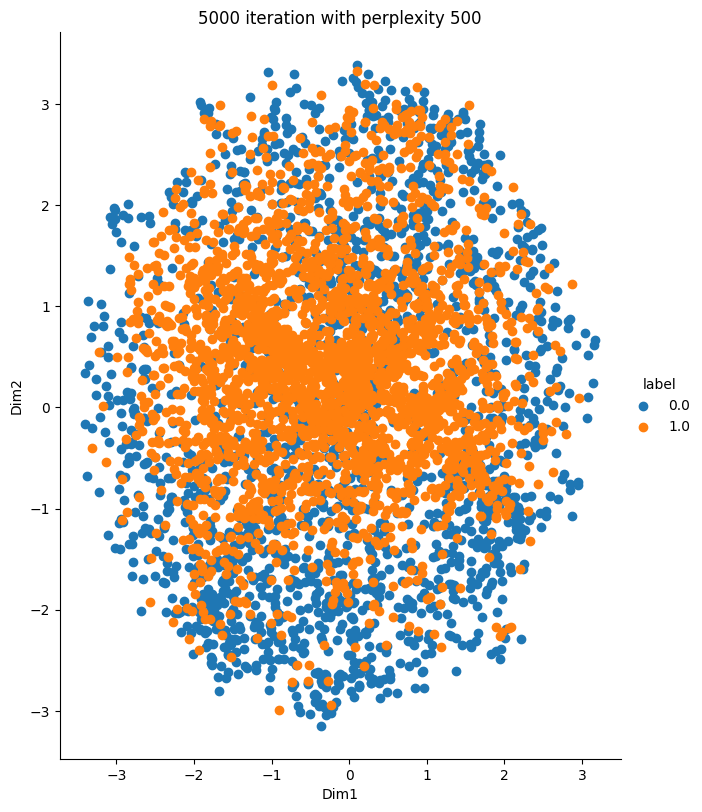

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler(copy=True, with_mean=True, with_std=True)

words = final_counts[0:5000,:].toarray()
std_data = scalar.fit_transform(words)
labels=df_train['label']
labels_5k = labels[0:5000]

perplexity = 500
n_iter = 5000
model = TSNE(n_components=2, random_state=0, perplexity=perplexity, n_iter=n_iter)
tsne_data= model.fit_transform(std_data)

tsne_data= np.vstack((tsne_data.T, labels_5k)).T
tsne_df= pd.DataFrame(tsne_data, columns=('Dim1','Dim2','label'))

print(tsne_df.head())
print(tsne_df.shape)

sns.FacetGrid(tsne_df, hue='label',aspect=0.8,height=8).map(plt.scatter, 'Dim1','Dim2').add_legend()
plt.title(f'{n_iter} iteration with perplexity {perplexity}')
plt.show()

In [ ]:
# final_counts[0],final_counts[1],type(words),words[0].shape

       Dim1      Dim2  label
0  1.614362  1.364548    1.0
1 -0.515836 -1.281669    1.0
2  1.394595 -0.323929    1.0
3 -0.121990  0.092616    1.0
4  0.056116  0.032314    1.0
(5000, 3)


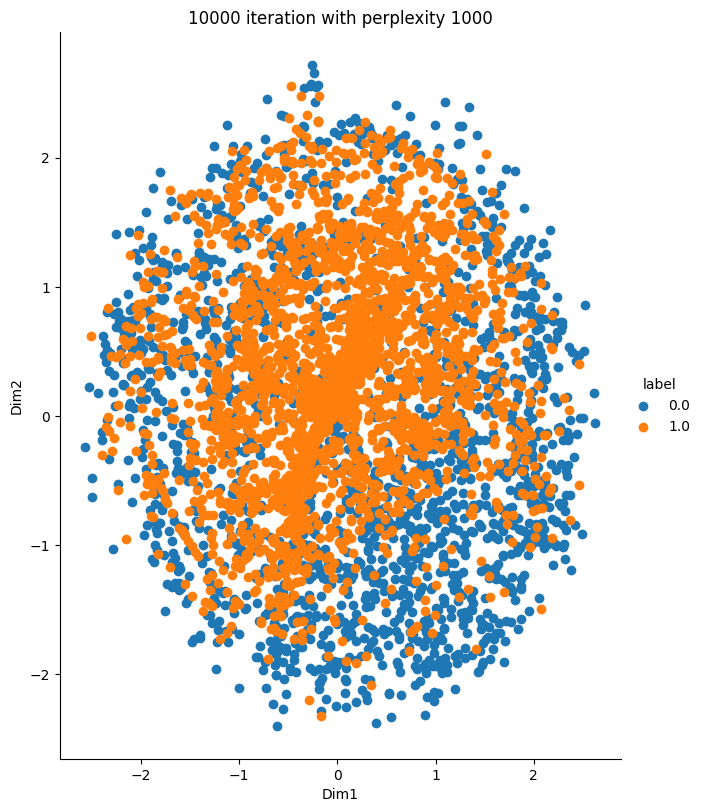

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler(copy=True, with_mean=True, with_std=True)

words = final_counts[0:5000,:].toarray()
std_data = scalar.fit_transform(words)
labels=df_train['label']
labels_5k = labels[0:5000]

perplexity = 1000
n_iter = 10000
model = TSNE(n_components=2, random_state=0, perplexity=perplexity, n_iter=n_iter)
tsne_data= model.fit_transform(std_data)

tsne_data= np.vstack((tsne_data.T, labels_5k)).T
tsne_df= pd.DataFrame(tsne_data, columns=('Dim1','Dim2','label'))

print(tsne_df.head())
print(tsne_df.shape)

sns.FacetGrid(tsne_df, hue='label',aspect=0.8,height=8).map(plt.scatter, 'Dim1','Dim2').add_legend()
plt.title(f'{n_iter} iteration with perplexity {perplexity}')
plt.show()

       Dim1      Dim2  label
0 -0.330106 -0.594463    1.0
1 -0.095659 -0.109161    1.0
2  0.222656  0.010005    1.0
3 -0.152507  0.027933    1.0
4 -0.151888  0.019888    1.0
(5000, 3)


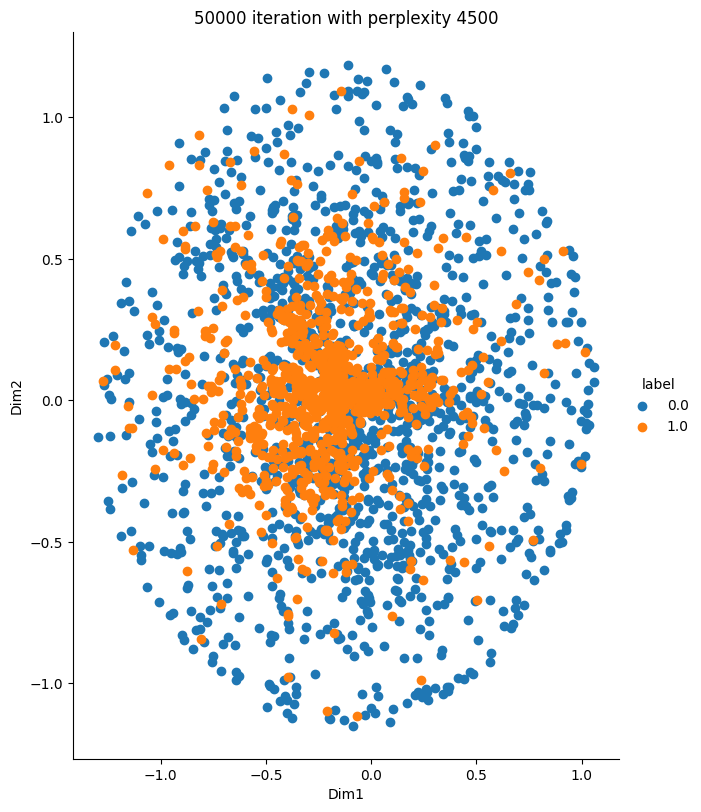

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler(copy=True, with_mean=True, with_std=True)

words = final_counts[0:5000,:].toarray()
std_data = scalar.fit_transform(words)
labels=df_train['label']
labels_5k = labels[0:5000]

perplexity = 4500
n_iter = 50000
model = TSNE(n_components=2, random_state=0, perplexity=perplexity, n_iter=n_iter)
tsne_data= model.fit_transform(std_data)

tsne_data= np.vstack((tsne_data.T, labels_5k)).T
tsne_df= pd.DataFrame(tsne_data, columns=('Dim1','Dim2','label'))

print(tsne_df.head())
print(tsne_df.shape)

sns.FacetGrid(tsne_df, hue='label',aspect=0.8,height=8).map(plt.scatter, 'Dim1','Dim2').add_legend()
plt.title(f'{n_iter} iteration with perplexity {perplexity}')
plt.show()

# TF-IDF

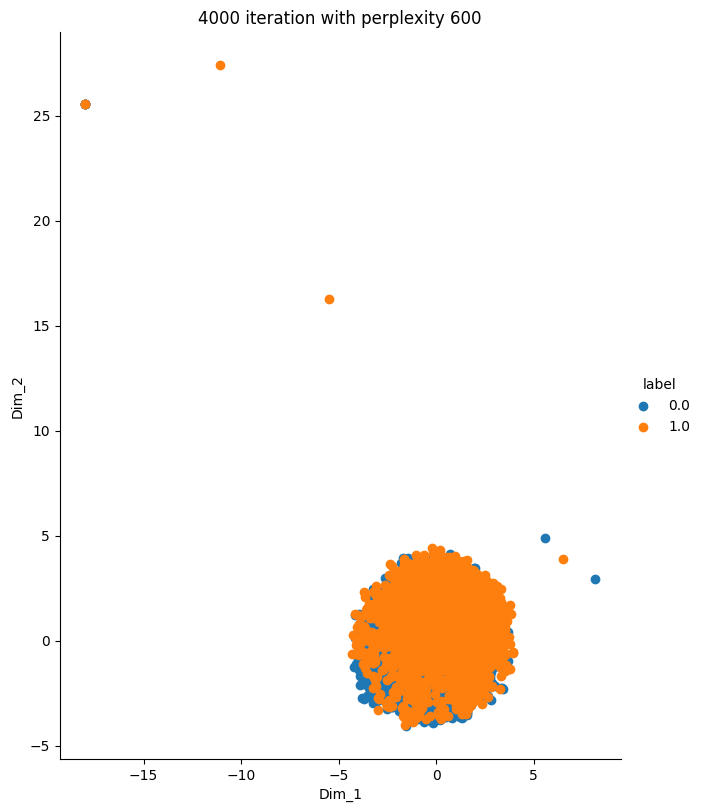

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
final_tfidf = tfidf_vect.fit_transform(df_train['processed_text'].values)

perplexity = 600
n_iter = 6000

data = final_tfidf[0:5000,:].toarray()
labels = df_train['label']
labels_5k = labels[0:5000]

model = TSNE(n_components= 2, random_state= 0, perplexity=perplexity, n_iter=n_iter)
tsne_data= model.fit_transform(data)

tsne_data = np.vstack((tsne_data.T, labels_5k)).T
tsne_df = pd.DataFrame(tsne_data, columns= ('Dim_1', 'Dim_2','label'))

sns.FacetGrid(tsne_df, hue='label',aspect=0.8,height=8).map(plt.scatter, 'Dim_1','Dim_2').add_legend()
plt.title(f'{n_iter} iteration with perplexity {perplexity}')
plt.show()


In [ ]:
tsne_df.columns

Index(['Dim_1', 'Dim_2', 'label'], dtype='object')

#Word2vec tsne-new approach

In [ ]:
import pickle
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

i = 0
list_of_sent = []
for sent in df_train['processed_text'].values:
    list_of_sent.append(sent.split())

In [ ]:
w2v_model = Word2Vec(list_of_sent, min_count= 5, vector_size=50, workers=4)

In [ ]:
w2v_words = list(w2v_model.wv.index_to_key)

print('Number of words that occurer minimum 5 times ', len(w2v_words))
print('Sample words ', w2v_words[0:50])

Number of words that occurer minimum 5 times  2828
Sample words  ['i', 'flight', 'service', 'time', 'the', 'get', 'would', 'booking', 'easy', 'use', 'customer', 'ticket', 'price', 'refund', 'flights', 'they', 'book', 'us', 'one', 'booked', 'great', 'company', 'back', 'never', 'good', 'money', 'justfly', 'it', 'we', 'got', 'called', 'airline', 'even', 'trip', 'experience', 'told', 'tickets', 'kiwi', 'this', 'call', 'airport', 'com', 'hours', 'website', 'site', 'could', 'first', 'best', 'pay', 'said']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
final_counts = count_vect.fit_transform(df_train['processed_text'].values)
count_vect_features = count_vect.get_feature_names_out()

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

5000
50


In [ ]:
sent_vectors = np.array(sent_vectors)
print(type(sent_vectors))
sent_vectors = sent_vectors[0:5000,:]
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
std_data = scalar.fit_transform(sent_vectors) 

<class 'numpy.ndarray'>


       Dim1      Dim2  label
0  3.840750 -1.931681    1.0
1 -3.921555  1.121088    1.0
2  5.903056 -3.518877    1.0
3 -1.780402 -1.947295    1.0
4 -1.485284  2.396585    1.0
(5000, 3)


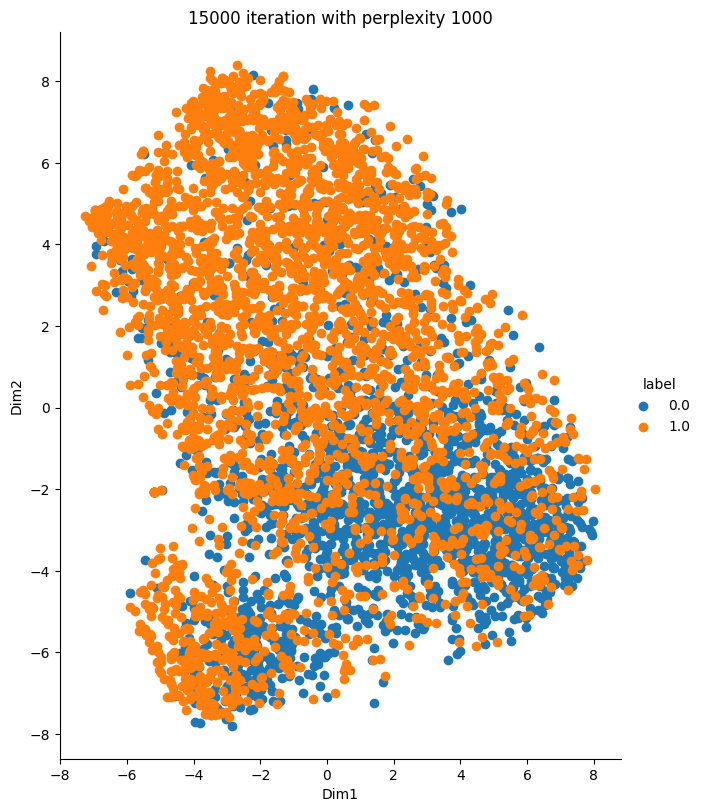

In [ ]:
from sklearn.manifold import TSNE

labels=df_train['label']
labels_5k = labels[0:5000]

perplexity = 1000
n_iter = 15000

model = TSNE(n_components=2, random_state=0, perplexity=perplexity, n_iter=n_iter)
tsne_data= model.fit_transform(std_data)

tsne_data= np.vstack((tsne_data.T, labels_5k)).T
tsne_df= pd.DataFrame(tsne_data, columns=('Dim1','Dim2','label'))

print(tsne_df.head())
print(tsne_df.shape)

sns.FacetGrid(tsne_df, hue='label',aspect=0.8,height=8).map(plt.scatter, 'Dim1','Dim2').add_legend()
plt.title(f'{n_iter} iteration with perplexity {perplexity}')
plt.show()

        Dim1       Dim2  label
0 -21.731745  -5.428702    1.0
1  20.331511   8.451377    1.0
2 -36.091709 -11.406688    1.0
3  -2.697468  17.954464    1.0
4  15.578717  -6.004288    1.0
(5000, 3)


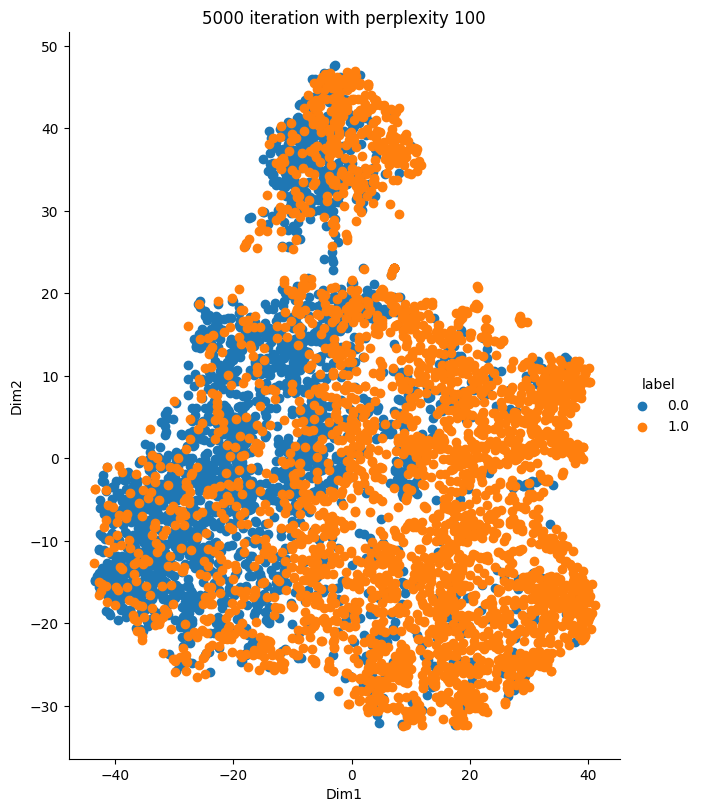

In [ ]:
from sklearn.manifold import TSNE

labels=df_train['label']
labels_5k = labels[0:5000]

perplexity = 100
n_iter = 5000

model = TSNE(n_components=2, random_state=0, perplexity=perplexity, n_iter=n_iter)
tsne_data= model.fit_transform(std_data)

tsne_data= np.vstack((tsne_data.T, labels_5k)).T
tsne_df= pd.DataFrame(tsne_data, columns=('Dim1','Dim2','label'))

print(tsne_df.head())
print(tsne_df.shape)

sns.FacetGrid(tsne_df, hue='label',aspect=0.8,height=8).map(plt.scatter, 'Dim1','Dim2').add_legend()
plt.title(f'{n_iter} iteration with perplexity {perplexity}')
plt.show()

In [ ]:
# https://github.com/chauhanakash23/Sentiment-analysis-Polarity-of-review-text/blob/master/t-SNE.ipynb
# https://distill.pub/2016/misread-tsne/

#word2vec tsne

In [ ]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in data:
        # print(sentence)
        word_list = sentence.split(" ")
        corpus.append(word_list)
        # break
            
    return corpus

corpus = build_corpus(X_train)

In [ ]:
len(corpus)

5000

In [ ]:
# building word2vec model
import gensim

model = gensim.models.word2vec.Word2Vec(corpus, vector_size=100, window=20, min_count=200, workers=4)
len(model.wv['flight']),model.wv['flight']

(100,
 array([ 0.29926354,  0.513902  ,  0.15572397, -0.03566517,  0.2902764 ,
        -0.84163576,  0.49249277,  0.45597532, -0.5261421 , -0.58230025,
         0.26416293, -0.2985641 , -0.10063395,  0.44406307,  0.3613396 ,
         0.03271512,  0.5246051 , -0.4004054 ,  0.0508443 , -0.6651165 ,
         0.49705118, -0.31443006,  0.02150035, -0.69671273, -0.27574182,
         0.33384508, -0.3992119 , -0.11994619, -0.12733872,  0.06507321,
         0.45723972, -0.1656909 ,  0.2097693 , -0.4504851 ,  0.00451149,
         0.3676734 , -0.04241923, -0.00764191, -0.14293084, -0.57140076,
        -0.20270737, -0.05048179,  0.04884332,  0.535109  ,  0.52710193,
         0.25740337, -0.05516499,  0.32755038, -0.00520334,  0.5319139 ,
        -0.3114533 , -0.00379442, -0.08264744,  0.32506865, -0.08371343,
         0.17683773,  0.1860772 ,  0.3839343 , -0.5219798 ,  0.9044126 ,
         0.18265414,  0.2570978 , -0.08050188,  0.03917351,  0.3407436 ,
         0.3376369 , -0.04947162,  0.2453762 

In [ ]:
X_train[5]

'we good experience flydealfare always mohamed harun helpful answering queries we complex itinerary made easy us thank support'

In [ ]:
def word_embedding(model):

  embeddings = []
  words = []

  for word in model.wv.index_to_key:
    embeddings.append(model.wv[word])
    words.append(word)

  return embeddings,words

In [ ]:
from sklearn.manifold import TSNE 

def tsne_plot(model):
    "Creates and TSNE model and plots it"

    embedding,word = word_embedding(model)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(embedding))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(word[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

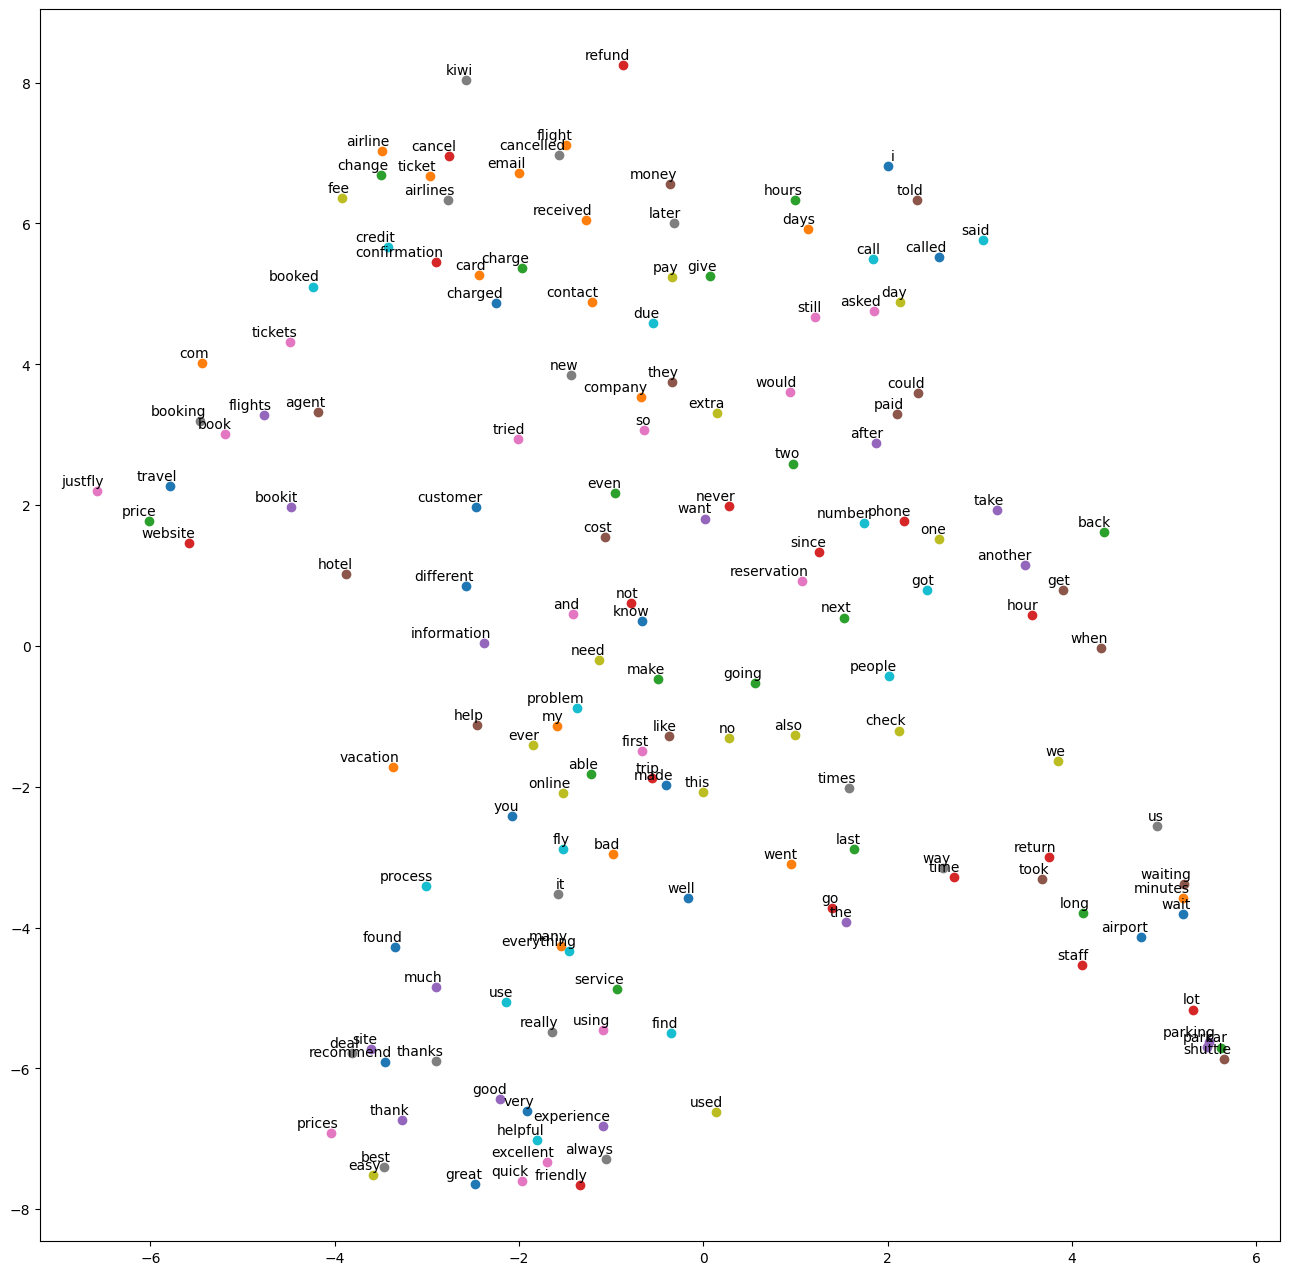

In [ ]:
tsne_plot(model)

In [ ]:
# # converting a list into a numpy array then reshaping it to a list
# pos_corpus = np.reshape(np.array(build_corpus(data[data['label']==1]['processed_text'])),-1)
# neg_corpus = np.reshape(np.array(build_corpus(data[data['label']==0]['processed_text'])),-1)


#experiment

In [ ]:
pos_corpus = build_corpus(data[data['label']==1]['processed_text'])
neg_corpus = build_corpus(data[data['label']==0]['processed_text'])

In [ ]:
pos_model = gensim.models.word2vec.Word2Vec(pos_corpus, vector_size=100, window=20, min_count=200, workers=4)
neg_model = gensim.models.word2vec.Word2Vec(neg_corpus, vector_size=100, window=20, min_count=200, workers=4)

pos_embedding,pos_word = word_embedding(pos_model)
neg_embedding,neg_word = word_embedding(neg_model)

In [ ]:
embedding_clusters = []
word_clusters = []

embedding_clusters.append(np.array(pos_embedding))
embedding_clusters.append(np.array(neg_embedding))
word_clusters.append(pos_word)
word_clusters.append(neg_word)


In [ ]:
embedding_clusters = np.array(embedding_clusters)
embedding_clusters[1].shape,embedding_clusters[0].shape,embedding_clusters[0][0].shape, embedding_clusters.shape


<ipython-input-22-e618986f4b4b>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  embedding_clusters = np.array(embedding_clusters)


((1087, 100), (2075, 100), (100,), (2,))

In [ ]:
# embedding_clusters[0].shape


In [ ]:
# embedding_clusters = np.array(embedding_clusters)
# n, m, k = embedding_clusters.shape
# tsne_model_en_2d = TSNE(perplexity=50, n_components=2, init='pca', n_iter=3500, random_state=32)
# embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

ValueError: ignored

# 

In [ ]:
# https://www.kaggle.com/code/aneridalwadi/nlp-word2vec-t-sne